# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Clemente, Lance\
_Student No._: 2021-07811\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: March 5 2024, 11:41 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lance Veyonce C. Clemente**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

Discussion:


Module A1 has us generating a dataset with set random noise. The dataset turns is split into multiple parts and is put through regression. Polyfitting the split data sets show best fit lines at different polynomial degrees. This causes the best fit lines to undergo overfitting and underfitting that wouldn't occur with the given 0-0.1 noise. From the results, the training set's rms error is accurate to that of the Fig. 8.14, although the cross validation set's rms error plot isn't. This may be due to the incorrect implementation of its polyfit function. Therefore to make an accurate conclusion, we will base it off the Fig 8.14. Since the error of the cross-validation is higher than the training's. A method to improve the model is to increase the size of the training set.

In [42]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import math
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


In [43]:
x = np.linspace(0,3,100)
#100 regularly spaced point from 0 to 3

In [44]:
np.append(x, np.linspace(0,3,100))
#turns into an array

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

In [54]:
y = (np.sin(x)*x)+np.random.normal(0,0.5,100)
#Part 1's y_i equation
#TRY VARYING STANDARD DEVIATION, alter noise a lot and compare if it messes up model.

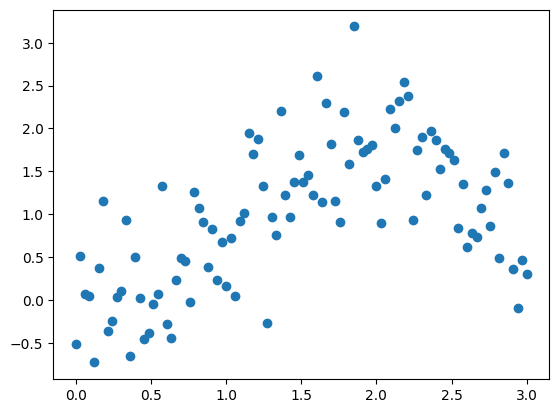

In [55]:
plt.scatter(x,y)
#Visualizing the noise.

In [56]:
x_training, x_crossvaltest, y_training, y_crossvaltest = train_test_split(x, y, test_size=0.50)
#splitting up the data set between training set, and crossvali&test sets.
x_test, x_crossval, y_test, y_crossval = train_test_split(x_crossvaltest, y_crossvaltest, test_size=0.50)
#splitting up further the crossvalidation and test data sets, giving the 2:1:1 ratio.

In [48]:
y_test

array([ 1.42854104,  1.40491782,  1.01655032,  0.21561097,  1.82057493,
        1.77581569,  0.0964747 ,  1.25222649,  1.55226824,  0.80185876,
        0.32882019,  0.99330036,  1.07793451,  0.40923492, -0.01301884,
        1.74366234,  0.94509549,  0.32319555,  0.80901288,  2.0131439 ,
        0.98596766,  0.3960968 ,  1.42137517,  1.79213771,  1.55530931])

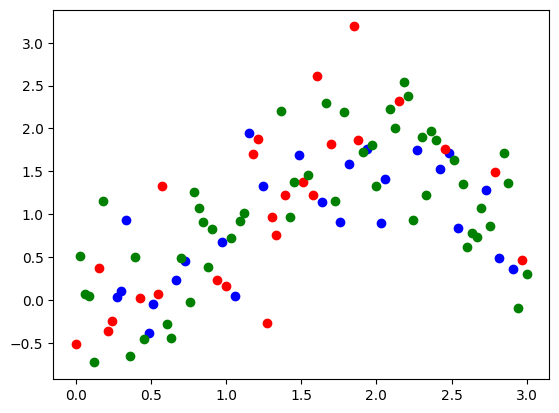

In [57]:
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_crossval, y_crossval, color = 'red')
plt.scatter(x_training, y_training, color = 'green')
#Visualizing the split data sets

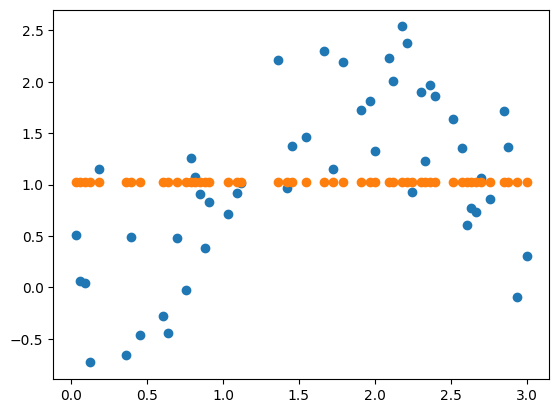

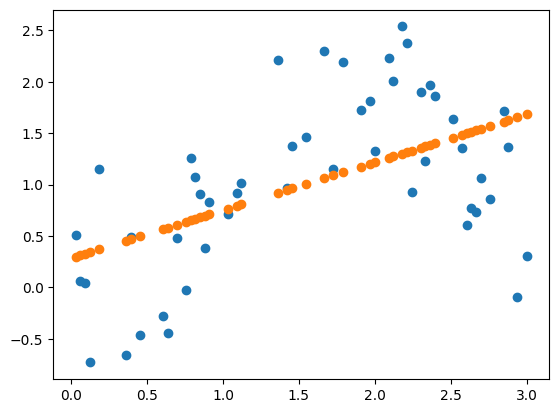

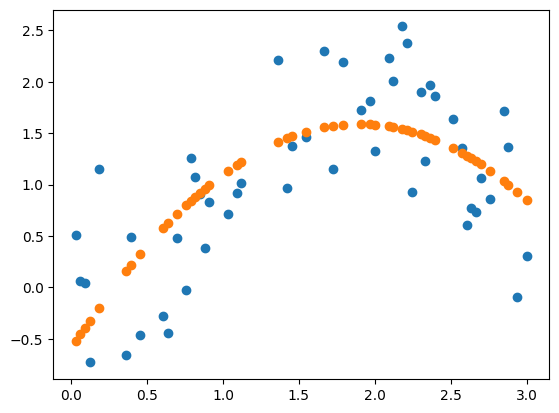

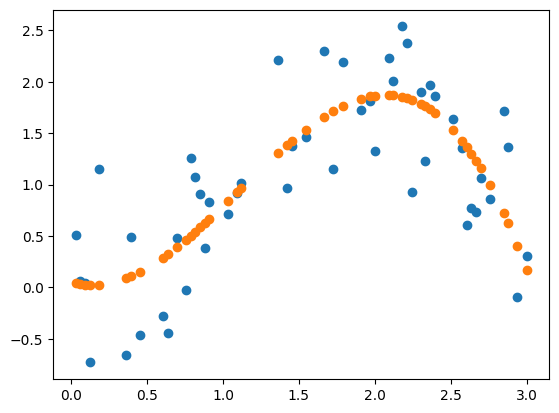

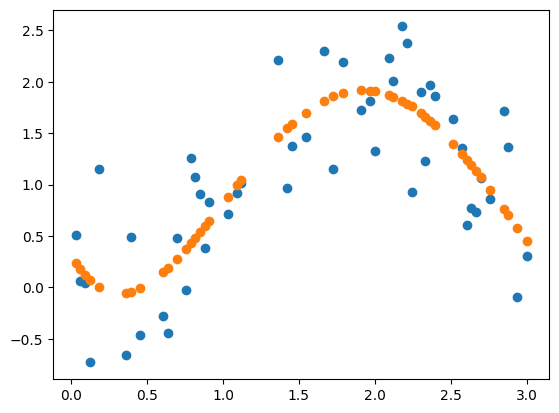

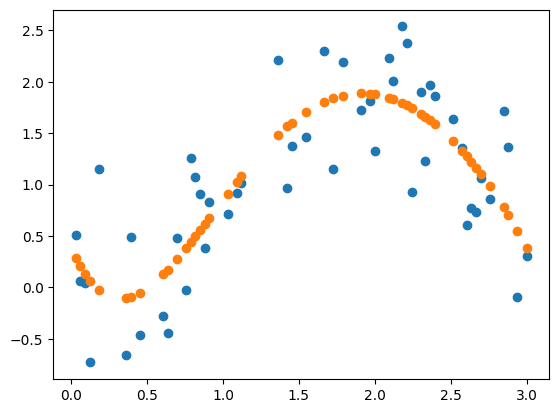

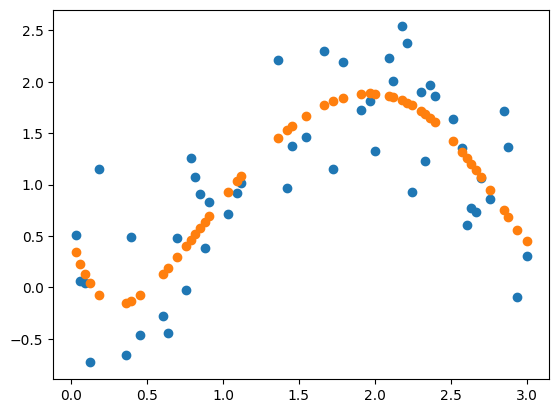

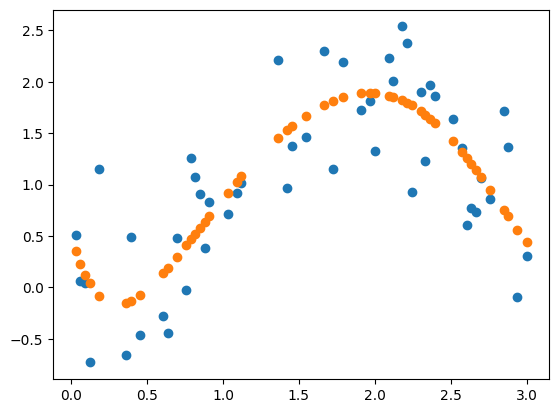

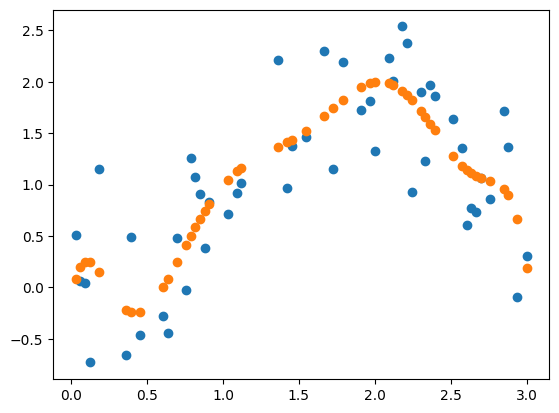

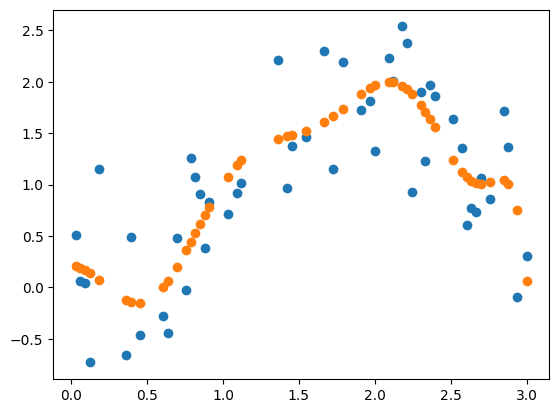

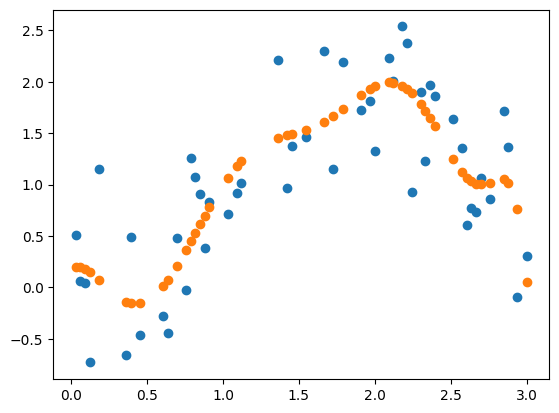

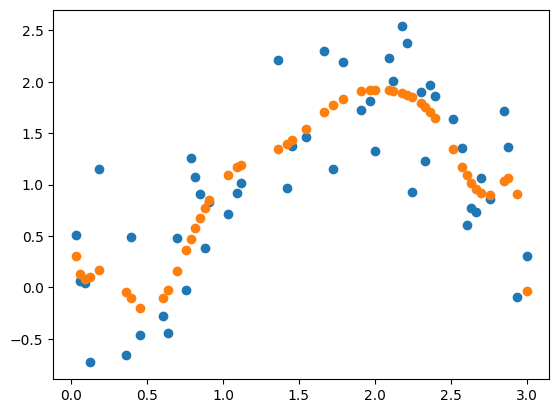

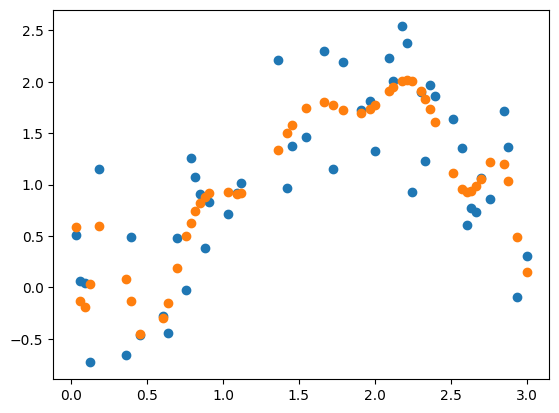

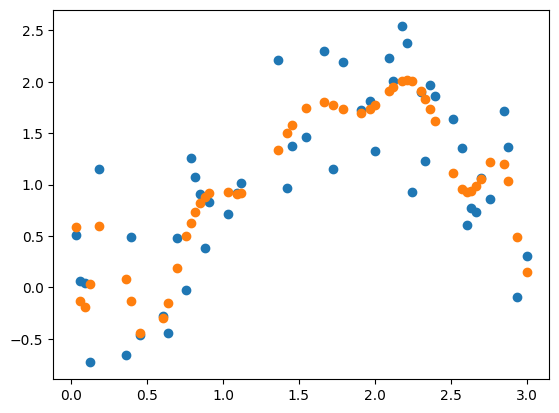

In [58]:
for deg in range(0,14):
  p = np.poly1d(np.polyfit(x_training, y_training, deg, rcond=None, full=False, w=None, cov=False))
  ypredict = p(x_training)
  plt.scatter(x_training,y_training)
  plt.scatter(x_training,ypredict)
  plt.show()

#best fit curve of the training set, per degree from 0 to 14
#p is for the trend line counterpart function

In [59]:
training = []
for deg in range(0,14):
  ptraining = np.poly1d(np.polyfit(x_training, y_training, deg, rcond=None, full=False, w=None, cov=False))
  y_predicttraining = ptraining(x_training)
  mse_training = np.square(np.subtract(y_training,y_predicttraining)).mean()
  rsme_training = math.sqrt(mse_training)
  print("Root Mean Square Error:\n")
  print(rsme_training)

  #WRONG process for rmse, use eq. 8.76, maybe it will fix graph of crossval.

  training.append(rsme_training)

Root Mean Square Error:

0.8301100808512543
Root Mean Square Error:

0.7128530353035838
Root Mean Square Error:

0.580639791020589
Root Mean Square Error:

0.5014515464684041
Root Mean Square Error:

0.48828888908051676
Root Mean Square Error:

0.4875248041404026
Root Mean Square Error:

0.4868343098510229
Root Mean Square Error:

0.48682321476547963
Root Mean Square Error:

0.47218707441927155
Root Mean Square Error:

0.4676639143206641
Root Mean Square Error:

0.46759904978947564
Root Mean Square Error:

0.46213594701891475
Root Mean Square Error:

0.4260004222172534
Root Mean Square Error:

0.425997714936354


In [60]:
crossval = []
for deg in range(0,14):
  pcrossval = np.poly1d(np.polyfit(x_crossval, y_crossval, deg, rcond=None, full=False, w=None, cov=False))
  y_predictcrossval = pcrossval(x_crossval)
  mse_crossval = np.square(np.subtract(y_crossval,y_predictcrossval)).mean()
  rsme_crossval = math.sqrt(mse_crossval)
  print("Root Mean Square Error:\n")
  print(rsme_crossval)

  #WRONG process for rmse, use eq. 8.76, maybe it will fix graph of crossval.

  crossval.append(rsme_crossval)

Root Mean Square Error:

0.9828887556105149
Root Mean Square Error:

0.7817199156921423
Root Mean Square Error:

0.6709981877557326
Root Mean Square Error:

0.5895003060991767
Root Mean Square Error:

0.573033993486589
Root Mean Square Error:

0.5576742371097736
Root Mean Square Error:

0.5569354467811726
Root Mean Square Error:

0.5415340469666803
Root Mean Square Error:

0.5342755779518571
Root Mean Square Error:

0.5318127686177869
Root Mean Square Error:

0.526387749327804
Root Mean Square Error:

0.5074799875395571
Root Mean Square Error:

0.5001718157843615
Root Mean Square Error:

0.4724375535117986


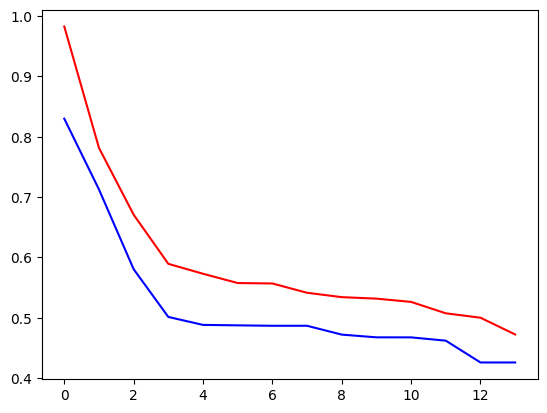

In [61]:
plt.plot(training, color = 'blue')
plt.plot(crossval, color = 'red')

#PG 359 FOR CONCLUSION